In [45]:
import pandas as pd

In [46]:
data=pd.read_csv('laptop_prices.csv')

In [47]:
data.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [48]:
data.tail()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13
11767,Samsung,Intel i7,8,256GB SSD,Nvidia RTX 3080,17.3,2560x1440,6.4,2.45,FreeDOS,1579.55


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [50]:
data.isnull().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [51]:
data.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [52]:
text_columns=data.select_dtypes(include='object').columns
numerical_columns=data.select_dtypes(exclude='object').columns

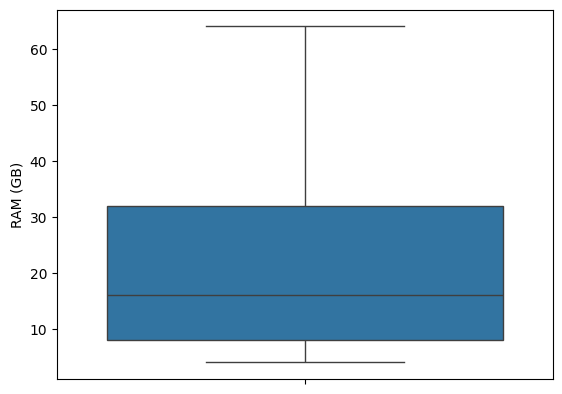

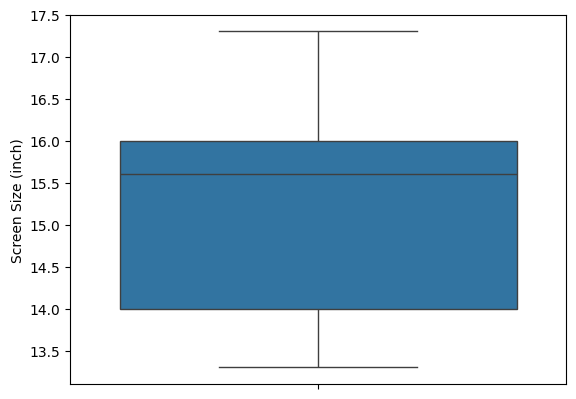

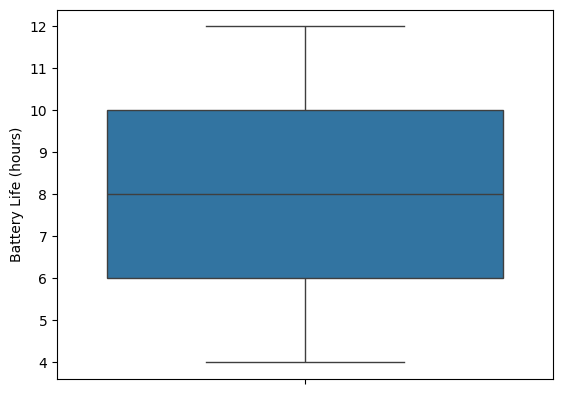

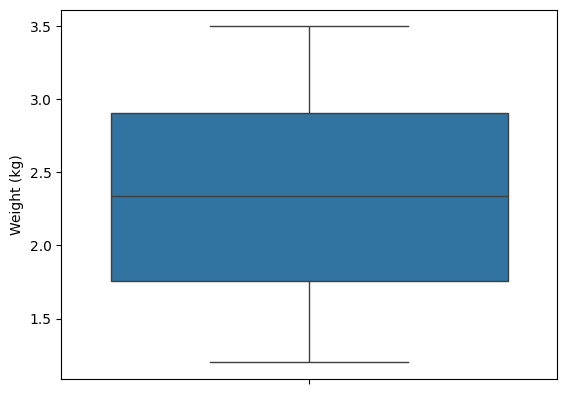

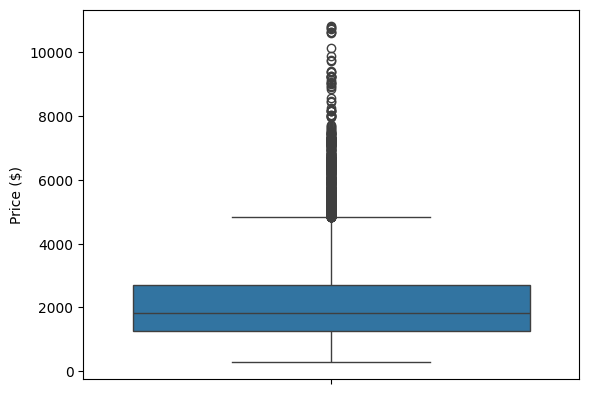

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in numerical_columns:
    sns.boxplot(data[column])
    plt.show()

In [55]:
# Outliers Removal
# Store original index to preserve data alignment
data['Index'] = data.index

In [56]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

data_cleaned = remove_outliers_iqr(data[numerical_columns])

In [57]:
data_cleaned

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
0,64,17.3,8.9,1.42,3997.07
1,4,14.0,9.4,2.57,1355.78
2,32,13.3,8.5,1.74,2673.07
3,4,13.3,10.5,3.10,751.17
4,4,16.0,5.7,3.38,2059.83
...,...,...,...,...,...
11763,4,17.3,11.5,1.58,704.82
11764,4,16.0,9.5,2.14,775.59
11765,4,15.6,8.2,2.05,2789.46
11766,16,13.3,7.5,1.48,1067.13


In [58]:
# Select only the valid indices from original dataset to retain text columns
data_complete = data.loc[data_cleaned.index]

In [59]:
# Reset index for a Clean Dataset
data_complete = data_complete.reset_index(drop=True)

In [60]:
data_complete

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Index
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07,0
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78,1
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07,2
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17,3
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83,4
...,...,...,...,...,...,...,...,...,...,...,...,...
11158,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82,11763
11159,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59,11764
11160,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46,11765
11161,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13,11766


In [61]:
correlation_matrix=data[numerical_columns].corr()
print(correlation_matrix['Price ($)'])

RAM (GB)                0.616221
Screen Size (inch)      0.069829
Battery Life (hours)    0.009778
Weight (kg)             0.002431
Price ($)               1.000000
Name: Price ($), dtype: float64


In [62]:
data_complete[text_columns]

,Brand,Processor,Storage,GPU,Resolution,Operating System
0,Apple,AMD Ryzen 3,512GB SSD,Nvidia GTX 1650,2560x1440,FreeDOS
1,Razer,AMD Ryzen 7,1TB SSD,Nvidia RTX 3080,1366x768,Linux
2,Asus,Intel i5,2TB SSD,Nvidia RTX 3060,3840x2160,FreeDOS
3,Lenovo,Intel i5,256GB SSD,Nvidia RTX 3080,1366x768,Windows
4,Razer,Intel i3,256GB SSD,AMD Radeon RX 6600,3840x2160,Linux
...,...,...,...,...,...,...
11158,Acer,Intel i3,2TB SSD,Nvidia RTX 2060,1366x768,macOS
11159,Asus,Intel i3,2TB SSD,AMD Radeon RX 6800,1366x768,Linux
11160,Razer,AMD Ryzen 9,2TB SSD,AMD Radeon RX 6600,2560x1440,Linux
11161,Samsung,AMD Ryzen 7,512GB SSD,Integrated,1920x1080,macOS


In [63]:
#label encoding ---> Ordinal data
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data_complete['Storage']=l.fit_transform(data_complete['Storage'])

In [64]:
data_complete[text_columns]

,Brand,Processor,Storage,GPU,Resolution,Operating System
0,Apple,AMD Ryzen 3,4,Nvidia GTX 1650,2560x1440,FreeDOS
1,Razer,AMD Ryzen 7,1,Nvidia RTX 3080,1366x768,Linux
2,Asus,Intel i5,3,Nvidia RTX 3060,3840x2160,FreeDOS
3,Lenovo,Intel i5,2,Nvidia RTX 3080,1366x768,Windows
4,Razer,Intel i3,2,AMD Radeon RX 6600,3840x2160,Linux
...,...,...,...,...,...,...
11158,Acer,Intel i3,3,Nvidia RTX 2060,1366x768,macOS
11159,Asus,Intel i3,3,AMD Radeon RX 6800,1366x768,Linux
11160,Razer,AMD Ryzen 9,3,AMD Radeon RX 6600,2560x1440,Linux
11161,Samsung,AMD Ryzen 7,4,Integrated,1920x1080,macOS


In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
#One Hot Encoding using pandas
data_complete=pd.get_dummies(data_complete,columns=['Brand','Processor','GPU','Resolution','Operating System'],drop_first=True)

In [67]:
data_complete=data_complete.drop('Index',axis=1)

In [68]:
data_complete

,RAM (GB),Storage,Screen Size (inch),Battery Life (hours),Weight (kg),Price ($),Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,...,GPU_Nvidia GTX 1650,GPU_Nvidia RTX 2060,GPU_Nvidia RTX 3060,GPU_Nvidia RTX 3080,Resolution_1920x1080,Resolution_2560x1440,Resolution_3840x2160,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,64,4,17.3,8.9,1.42,3997.07,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,4,1,14.0,9.4,2.57,1355.78,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,32,3,13.3,8.5,1.74,2673.07,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
3,4,2,13.3,10.5,3.10,751.17,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,4,2,16.0,5.7,3.38,2059.83,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,4,3,17.3,11.5,1.58,704.82,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
11159,4,3,16.0,9.5,2.14,775.59,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
11160,4,3,15.6,8.2,2.05,2789.46,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
11161,16,4,13.3,7.5,1.48,1067.13,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [69]:
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RAM (GB)                  11163 non-null  int64  
 1   Storage                   11163 non-null  int64  
 2   Screen Size (inch)        11163 non-null  float64
 3   Battery Life (hours)      11163 non-null  float64
 4   Weight (kg)               11163 non-null  float64
 5   Price ($)                 11163 non-null  float64
 6   Brand_Apple               11163 non-null  bool   
 7   Brand_Asus                11163 non-null  bool   
 8   Brand_Dell                11163 non-null  bool   
 9   Brand_HP                  11163 non-null  bool   
 10  Brand_Lenovo              11163 non-null  bool   
 11  Brand_MSI                 11163 non-null  bool   
 12  Brand_Microsoft           11163 non-null  bool   
 13  Brand_Razer               11163 non-null  bool   
 14  Brand_

In [70]:
data_complete.describe()

,RAM (GB),Storage,Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000
mean,23.138224,2.016841,15.202589,8.019878,2.340336,1974.201247
std,20.751095,1.421254,1.438435,2.303559,0.667454,949.493231
min,4.000000,0.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,1.000000,14.000000,6.000000,1.760000,1252.015000
50%,16.000000,2.000000,15.600000,8.000000,2.340000,1766.270000
75%,32.000000,3.000000,16.000000,10.000000,2.910000,2525.990000
max,64.000000,4.000000,17.300000,12.000000,3.500000,4837.020000


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit_transform(data_complete)

array([[1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.25      , 0.175     , ..., 1.        , 0.        ,
        0.        ],
       [0.46666667, 0.75      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.75      , 0.575     , ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.06666667, 0.5       , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [72]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X=data_complete.drop('Price ($)',axis=1)

In [75]:
X

,RAM (GB),Storage,Screen Size (inch),Battery Life (hours),Weight (kg),Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,...,GPU_Nvidia GTX 1650,GPU_Nvidia RTX 2060,GPU_Nvidia RTX 3060,GPU_Nvidia RTX 3080,Resolution_1920x1080,Resolution_2560x1440,Resolution_3840x2160,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,64,4,17.3,8.9,1.42,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,4,1,14.0,9.4,2.57,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,32,3,13.3,8.5,1.74,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
3,4,2,13.3,10.5,3.10,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
4,4,2,16.0,5.7,3.38,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,4,3,17.3,11.5,1.58,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
11159,4,3,16.0,9.5,2.14,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
11160,4,3,15.6,8.2,2.05,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
11161,16,4,13.3,7.5,1.48,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [76]:
y=data_complete[['Price ($)']]

In [77]:
y

,Price ($)
0,3997.07
1,1355.78
2,2673.07
3,751.17
4,2059.83
...,...
11158,704.82
11159,775.59
11160,2789.46
11161,1067.13


In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [79]:
X_test

,RAM (GB),Storage,Screen Size (inch),Battery Life (hours),Weight (kg),Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,...,GPU_Nvidia GTX 1650,GPU_Nvidia RTX 2060,GPU_Nvidia RTX 3060,GPU_Nvidia RTX 3080,Resolution_1920x1080,Resolution_2560x1440,Resolution_3840x2160,Operating System_Linux,Operating System_Windows,Operating System_macOS
4961,64,3,13.3,8.6,1.58,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2195,32,3,15.6,5.6,2.06,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8317,64,1,13.3,7.1,1.95,False,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False
9037,16,4,13.3,11.2,2.60,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1766,16,0,17.3,7.1,1.76,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,64,0,13.3,8.9,2.85,False,False,False,False,True,...,False,False,False,True,False,True,False,False,False,True
9520,8,0,15.6,8.9,2.90,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6382,32,1,17.3,4.2,1.21,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4779,16,2,15.6,9.0,1.71,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False


In [80]:
y_test

,Price ($)
4961,1702.73
2195,2404.10
8317,2367.54
9037,1524.82
1766,4150.29
...,...
8993,4153.59
9520,983.13
6382,1594.55
4779,1958.11


In [81]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [82]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "SVR":SVR(),
    "Random forest":RandomForestRegressor()
}

In [83]:
for i in range(len(list(models))):
    model=(list(models.values())[i])
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print(list(models.keys())[i]) #for giving headings to each model
    print(mean_squared_error(y_test,pred))
    print(mean_absolute_error(y_test,pred))
    print(r2_score(y_test,pred))
    print("*"*30)

LinearRegression
80027.69269150861
217.26711312751405
0.9116060715527391
******************************
Lasso
80200.86552278807
216.4176284767966
0.9114147949290816
******************************
Ridge
80015.60290067157
217.11783432170822
0.9116194252315751
******************************


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR
660985.8421737597
620.6031761259663
0.26991353526853235
******************************


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random forest
38314.590842394195
135.8367960883846
0.9576799344388942
******************************


In [84]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [85]:
import pickle
with open("random_forest_file.pkl","wb") as file_rfr:
    pickle.dump(model,file_rfr)